## Human Data

In [48]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load the human dataset
# file_path = 'moment-by-moment gaze data/_human data.csv'
# data_with_headers = pd.read_csv(file_path)

# # Display the first few rows of the dataframe to understand its structure
# data_with_headers.head()

In [49]:
# # Filter rows for the right eye only
# right_eye_data_with_headers = data_with_headers[data_with_headers['Eye'] == 'Right']

# # Since we only need to use the 'Attention' column for labeling, we will extract 'Time' and 'Attention' columns
# plot_data_with_headers = right_eye_data_with_headers[['Time', 'Attention']].copy()

# # Convert 'Attention' to a binary representation for plotting: 'Sign' = 1, 'Article' = 0
# # Assuming 'Sign' and 'Text' are the only possible values for 'Attention', if it's not 'Sign', we'll consider it 'Article'
# plot_data_with_headers['Attention_Binary'] = plot_data_with_headers['Attention'].apply(lambda x: 1 if x == 'Sign' else 0)

# # Plotting
# fig, ax = plt.subplots(figsize=(14, 4))

# # Plot the attention over time: a value of 1 (Sign) or 0 (Article)
# ax.plot(plot_data_with_headers['Time'], plot_data_with_headers['Attention_Binary'], drawstyle='steps-post')

# # Improve the plot aesthetics
# ax.set_xlabel('Time (seconds)')
# ax.set_ylabel('Attention')
# ax.set_title('Moment-by-moment Attention Allocation')
# ax.set_yticks([0, 1])
# ax.set_yticklabels(['Article', 'Sign'])
# ax.set_ylim(-0.5, 1.5)  # Adding some space for clarity
# ax.grid(True)

# # Show the plot
# plt.tight_layout()
# plt.show()


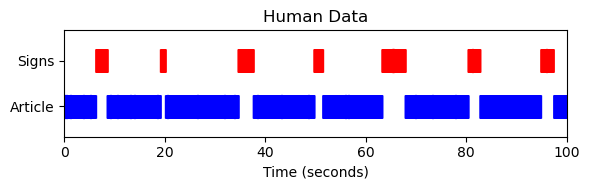

In [50]:
from matplotlib.patches import Patch
import matplotlib.patches as patches

import pandas as pd
import matplotlib.pyplot as plt

# Load the human dataset
file_path = 'moment-by-moment gaze data/_human data.csv'
data_with_headers = pd.read_csv(file_path)

# Filter rows for the right eye only
right_eye_data_with_headers = data_with_headers[data_with_headers['Eye'] == 'Right']

# Since we only need to use the 'Attention' column for labeling, we will extract 'Time' and 'Attention' columns
plot_data_with_headers = right_eye_data_with_headers[['Time', 'Attention']].copy()

# Convert 'Attention' to a binary representation for plotting: 'Sign' = 1, 'Article' = 0
# Assuming 'Sign' and 'Text' are the only possible values for 'Attention', if it's not 'Sign', we'll consider it 'Article'
plot_data_with_headers['Attention_Binary'] = plot_data_with_headers['Attention'].apply(lambda x: 1 if x == 'Sign' else 0)

# Use the processed plot data
plot_data = plot_data_with_headers.copy()

# Calculate the percentage of instances with 'sign'
num_signs = plot_data['Attention_Binary'].sum()
total_instances = plot_data.shape[0]

# Rect width
rect_width = 0.001

# Annotation space
annotation_space = 0  # space for annotation

# max_time = plot_data['Time'].max()
max_time = 100

colour_sign = 'red'
colour_ohmd = 'blue'

# Calculate the percentage
percentage_signs = int((num_signs / total_instances) * 100)
percentage_articles = 100 - percentage_signs

# Define the positions for the rectangles
env_position = 0.65  # y-value for environmental signs (red)
ohmd_position = 1 - env_position  # y-value for OHMD reading texts (blue)

# Define the height of the rectangles
rectangle_height = 0.15  # Increased for better visibility

# Create the plot
fig, ax = plt.subplots(figsize=(6, 2))

# We will track the positions where red rectangles are placed
red_positions = []

# First, we draw the red rectangles for 'Signs'
for time, group in plot_data[plot_data['Attention_Binary'] == 1].groupby('Time'):
    # Create the rectangle for 'Signs'
    rect = patches.Rectangle((time, env_position - rectangle_height / 2), rect_width, rectangle_height,
                             facecolor=colour_sign, edgecolor=colour_sign)
    ax.add_patch(rect)
    # Add the position to the list
    red_positions.append(time)

# Then, we draw the blue rectangles for 'Article' only in positions where there are no red rectangles
for time, group in plot_data[plot_data['Attention_Binary'] == 0].groupby('Time'):
    if time not in red_positions:
        # Create the rectangle for 'Article'
        rect = patches.Rectangle((time, ohmd_position - rectangle_height / 2), rect_width, rectangle_height,
                                 facecolor=colour_ohmd, edgecolor=colour_ohmd)
        ax.add_patch(rect)

# Set the limits and labels for the plot
ax.set_xlim(0, max_time + annotation_space)
ax.set_ylim(0, 1)  # Y-limits set from 0 to 1 for clarity
ax.set_xlabel('Time (seconds)')
ax.set_title('Human Data')
ax.set_yticks([env_position, ohmd_position])
ax.set_yticklabels(['Signs', 'Article'])
ax.set_ylim(0.15, 0.85)
# ax.grid(True)

# # Annotate the percentages on the right side of the plot
# ax.text((max_time + annotation_space) * 1.05, env_position, f'{percentage_signs}%', fontsize=12, ha='center', va='center', color='red')
# ax.text((max_time + annotation_space) * 1.05, ohmd_position, f'{percentage_articles}%', fontsize=12, ha='center', va='center', color='blue')

# Show the plot
plt.tight_layout()
plt.show()


## Simulated Results

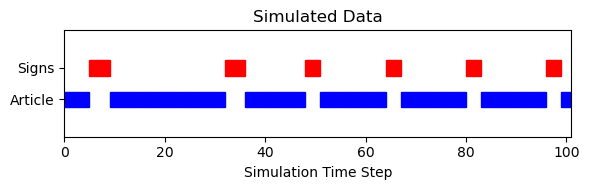

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import ast

# Read the raw string from the file
file_path = 'moment-by-moment gaze data/simulated data 22401.txt'
with open(file_path, 'r') as file:
    raw_contents = file.read()

# Parse the string representation of the list into an actual Python list
data_list = ast.literal_eval(raw_contents)

# Convert the list into a DataFrame
data_df = pd.DataFrame(data_list, columns=['Attention_Type'])

# Add a 'Time' column assuming each data point is sampled at 1-second intervals
data_df['Time'] = data_df.index

# Define a binary column where 'Sign' and 'ENV' are considered as '1' (attention to signs)
# and 'OHMD' is considered as '0' (attention to article)
data_df['Attention_Binary'] = data_df['Attention_Type'].apply(lambda x: 1 if x in ['Sign', 'ENV'] else 0)

# Calculate the percentage of instances with 'sign'
num_signs = data_df['Attention_Binary'].sum()
total_instances = data_df.shape[0]

# Calculate the percentages
percentage_signs = int((num_signs / total_instances) * 100+1)
percentage_articles = 100 - percentage_signs

# Define the positions for the rectangles
env_position = 0.65  # y-value for environmental signs (red)
ohmd_position = 1 - env_position  # y-value for OHMD reading texts (blue)

# Define the height of the rectangles
rectangle_height = 0.15  # Increased for better visibility

# Create the plot
fig, ax = plt.subplots(figsize=(6, 2))

# Define colors
colour_sign = 'red'
colour_ohmd = 'blue'

# Draw the red rectangles for 'Signs'
for time in data_df[data_df['Attention_Binary'] == 1]['Time']:
    rect = patches.Rectangle((time, env_position - rectangle_height / 2), 1, rectangle_height,
                             facecolor=colour_sign, edgecolor=colour_sign)
    ax.add_patch(rect)

# Draw the blue rectangles for 'Article' only in positions where there are no red rectangles
for time in data_df[data_df['Attention_Binary'] == 0]['Time']:
    rect = patches.Rectangle((time, ohmd_position - rectangle_height / 2), 1, rectangle_height,
                             facecolor=colour_ohmd, edgecolor=colour_ohmd)
    ax.add_patch(rect)

# Set the limits and labels for the plot
# max_time = data_df['Time'].max()
ax.set_xlim(0, max_time+1)
ax.set_ylim(0, 1)  # Y-limits set from 0 to 1 for clarity
ax.set_xlabel('Simulation Time Step')
ax.set_title('Simulated Data')
ax.set_yticks([env_position, ohmd_position])
ax.set_yticklabels(['Signs', 'Article'])

# # Annotate the percentages on the right side of the plot
# ax.text(max_time * 1.07, env_position, f'{percentage_signs}%', fontsize=12, ha='center', va='center', color='red')
# ax.text(max_time * 1.07, ohmd_position, f'{percentage_articles}%', fontsize=12, ha='center', va='center', color='blue')

# Show the plot
plt.tight_layout()
plt.show()


Plot saved as study4_mbm_attentionshifts.png


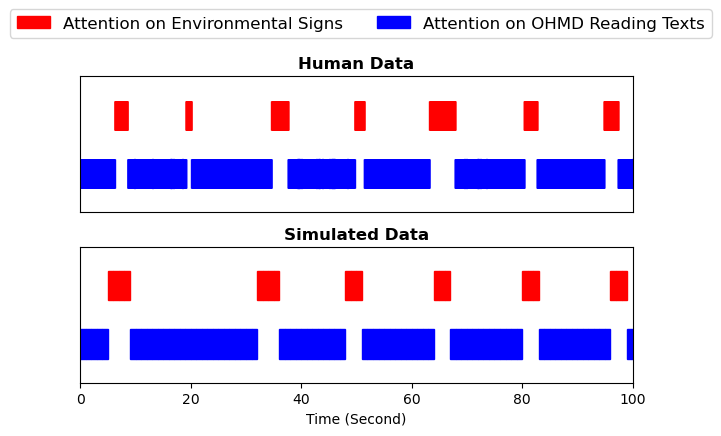

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import ast

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 4))  # Increase the figure size if needed

# Plot for the human data  #########################################################################################
# Load the human dataset
file_path = 'moment-by-moment gaze data/_human data.csv'
data_with_headers = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data_with_headers.head()

# Filter rows for the right eye only
right_eye_data_with_headers = data_with_headers[data_with_headers['Eye'] == 'Right']

# Since we only need to use the 'Attention' column for labeling, we will extract 'Time' and 'Attention' columns
plot_data_with_headers = right_eye_data_with_headers[['Time', 'Attention']].copy()

# Convert 'Attention' to a binary representation for plotting: 'Sign' = 1, 'Article' = 0
# Assuming 'Sign' and 'Text' are the only possible values for 'Attention', if it's not 'Sign', we'll consider it 'Article'
plot_data_with_headers['Attention_Binary'] = plot_data_with_headers['Attention'].apply(lambda x: 1 if x == 'Sign' else 0)

# Use the processed plot data
plot_data = plot_data_with_headers.copy()

# Calculate the percentage of instances with 'sign'
num_signs = plot_data['Attention_Binary'].sum()
total_instances = plot_data.shape[0]

# Rect width
rect_width = 0.001

# Annotation space
annotation_space = 0  # space for annotation

# max_time = plot_data['Time'].max()
max_time = 100

colour_sign = 'red'
colour_ohmd = 'blue'

# Calculate the percentage
percentage_signs = int((num_signs / total_instances) * 100)
percentage_articles = 100 - percentage_signs

# Define the positions for the rectangles
env_position = 0.65  # y-value for environmental signs (red)
ohmd_position = 1 - env_position  # y-value for OHMD reading texts (blue)

# Define the height of the rectangles
rectangle_height = 0.15  # Increased for better visibility

# We will track the positions where red rectangles are placed
red_positions = []

# First, we draw the red rectangles for 'Signs'
for time, group in plot_data[plot_data['Attention_Binary'] == 1].groupby('Time'):
    # Create the rectangle for 'Signs'
    rect = patches.Rectangle((time, env_position - rectangle_height / 2), rect_width, rectangle_height,
                             facecolor=colour_sign, edgecolor=colour_sign)
    ax1.add_patch(rect)
    # Add the position to the list
    red_positions.append(time)

# Then, we draw the blue rectangles for 'Article' only in positions where there are no red rectangles
for time, group in plot_data[plot_data['Attention_Binary'] == 0].groupby('Time'):
    if time not in red_positions:
        # Create the rectangle for 'Article'
        rect = patches.Rectangle((time, ohmd_position - rectangle_height / 2), rect_width, rectangle_height,
                                 facecolor=colour_ohmd, edgecolor=colour_ohmd)
        ax1.add_patch(rect)

# Set the limits and labels for the plot
ax1.set_xlim(0, max_time)
ax1.set_xticklabels([])
ax1.tick_params(axis='x', length=0)
ax1.set_yticklabels([])
ax1.tick_params(axis='y', length=0)
ax1.set_title('Human Data', weight='bold')
ax1.set_ylim(0.15, 0.85)

# Plot for the simulated data #########################################################################################
# Read the raw string from the file
file_path = 'moment-by-moment gaze data/simulated data 22401.txt'
with open(file_path, 'r') as file:
    raw_contents = file.read()

# Parse the string representation of the list into an actual Python list
data_list = ast.literal_eval(raw_contents)

# Convert the list into a DataFrame
data_df = pd.DataFrame(data_list, columns=['Attention_Type'])

# Add a 'Time' column assuming each data point is sampled at 1-second intervals
data_df['Time'] = data_df.index

# Define a binary column where 'Sign' and 'ENV' are considered as '1' (attention to signs)
# and 'OHMD' is considered as '0' (attention to article)
data_df['Attention_Binary'] = data_df['Attention_Type'].apply(lambda x: 1 if x in ['Sign', 'ENV'] else 0)

# Calculate the percentage of instances with 'sign'
num_signs = data_df['Attention_Binary'].sum()
total_instances = data_df.shape[0]

# Calculate the percentages
percentage_signs = int((num_signs / total_instances) * 100+1)
percentage_articles = 100 - percentage_signs

# Define the positions for the rectangles
env_position = 0.65  # y-value for environmental signs (red)
ohmd_position = 1 - env_position  # y-value for OHMD reading texts (blue)

# Define the height of the rectangles
rectangle_height = 0.15  # Increased for better visibility

# Draw the red rectangles for 'Signs'
for time in data_df[data_df['Attention_Binary'] == 1]['Time']:
    rect = patches.Rectangle((time, env_position - rectangle_height / 2), 1, rectangle_height,
                             facecolor=colour_sign, edgecolor=colour_sign)
    ax2.add_patch(rect)

# Draw the blue rectangles for 'Article' only in positions where there are no red rectangles
for time in data_df[data_df['Attention_Binary'] == 0]['Time']:
    rect = patches.Rectangle((time, ohmd_position - rectangle_height / 2), 1, rectangle_height,
                             facecolor=colour_ohmd, edgecolor=colour_ohmd)
    ax2.add_patch(rect)

# Set the limits and labels for the plot
# max_time = data_df['Time'].max()
ax2.set_xlim(0, max_time)
ax2.set_yticklabels([])
ax2.tick_params(axis='y', length=0)
ax2.set_ylim(0.15, 0.85)
ax2.set_xlabel('Time (Second)')
ax2.set_title('Simulated Data', weight='bold')

# Create custom legend handles
legend_elements = [
    patches.Patch(facecolor='red', edgecolor='red', label='Attention on Environmental Signs'),
    patches.Patch(facecolor='blue', edgecolor='blue', label='Attention on OHMD Reading Texts')
]

# Create a unified legend
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2, fontsize=12)

# Adjust the layout so the plots are not overlapping
plt.tight_layout()

# Save the plot to a local file
output_filename = 'study4_mbm_attentionshifts.png'
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
print(f'Plot saved as {output_filename}')

# Show the combined plot
plt.show()
